In [1]:
pip install faker

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install TextBlob

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import random
from faker import Faker
from textblob import TextBlob


# Generate University Information
fake = Faker()
universities = pd.DataFrame(columns=['University ID', 'University Name', 'Location', 'Tuition Fees', 'Founding Year', 'Accreditation Status'])
for i in range(1, 51):
    university_info = {
        'University ID': i,
        'University Name': fake.company(),
        'Location': fake.city() + ', ' + fake.country(),
        'Tuition Fees': fake.random_number(digits=5),
        'Founding Year': fake.year(),
        'Accreditation Status': fake.random_element(elements=('Accredited', 'Not Accredited'))
    }
    universities = pd.concat([universities, pd.DataFrame([university_info])], ignore_index=True)
universities.to_csv('universities.csv',index=False)
# Generate Course Offerings
courses = pd.DataFrame(columns=['Course ID', 'Course Name', 'Credit Hours', 'Department', 'University ID'])
for i in range(1, 101):
    course_info = {
        'Course ID': i,
        'Course Name': fake.job(),
        'Credit Hours': fake.random_int(min=1, max=4),
        'Department': fake.random_element(elements=('Engineering', 'Computer Science', 'Business', 'Mathematics', 'Biology')),
        'University ID': fake.random_int(min=1, max=50)
    }
    courses = pd.concat([courses, pd.DataFrame([course_info])], ignore_index=True)

# Save Course Information to CSV
courses.to_csv('courses.csv', index=False)

# Generate Student Reviews and Sentiments
reviews = pd.DataFrame(columns=['Review ID', 'Student ID', 'Review'])
for i in range(1, 1001):
    review_info = {
        'Review ID': i,
        'Student ID': fake.random_int(min=1, max=200),
         'Review': ' '.join(fake.sentences(nb=3))   # Generate a sentence with 10 words
    }
    reviews = pd.concat([reviews, pd.DataFrame([review_info])], ignore_index=True)
# Add Sentiment Analysis
sentiments = []
for review in reviews['Review']:
    analysis = TextBlob(review)
    sentiment_score = analysis.sentiment.polarity
    if sentiment_score > 0:
        sentiment = 'Positive'
    elif sentiment_score < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    sentiments.append(sentiment)

reviews['Sentiment'] = sentiments

# Save Reviews with Sentiments to CSV
reviews.to_csv('student_reviews.csv', index=False)

# Generate Employment Outcomes
employment = pd.DataFrame(columns=['University ID', 'Field of Study', 'Employment Rate (%)', 'Average Salary'])
for i in range(1, 51):
    employment_info ={
        'University ID': i,
        'Field of Study': fake.catch_phrase(),
        'Employment Rate (%)': random.randint(50, 100),
        'Average Salary': '$' + str(random.randint(30000, 100000)) + '/year'
    }
    employment=pd.concat([employment,pd.DataFrame([employment_info])],ignore_index=True)
        
employment.to_csv('emploment.csv',index=False)
# Generate Demographic Data
demographics = pd.DataFrame(columns=['Student ID', 'Age', 'Gender', 'Ethnicity', 'Income'])
for student_id in range(1, 201):
    demographic_info = {
        'Student ID': student_id,
        'Age': fake.random_int(min=18, max=25),
        'Gender': fake.random_element(elements=('Male', 'Female')),
        'Ethnicity': fake.random_element(elements=('White', 'Black', 'Hispanic', 'Asian', 'Other')),
        'Income': fake.random_number(digits=5)
    }
    demographics = pd.concat([demographics, pd.DataFrame([demographic_info])], ignore_index=True)

demographics.to_csv('demographics.csv', index=False)
# Generate Miscellaneous Data
miscellaneous_data = pd.DataFrame(columns=['ID', 'Category', 'Value'])
for i in range(1, 1001):
    category = fake.random_element(elements=('A', 'B', 'C', 'D', 'E'))
    value = None
    if category == 'A':
        value = fake.random_number(digits=5)
    elif category == 'B':
        value = fake.word()
    elif category == 'C':
        value = fake.date_of_birth()
    elif category == 'D':
        value = fake.random_element(elements=('Yes', 'No'))
    elif category == 'E':
        value = fake.random_number(digits=3) / 10.0  # Generate a decimal value

    data_info = {
        'ID': i,
        'Category': category,
        'Value': value
    }
    miscellaneous_data = pd.concat([miscellaneous_data, pd.DataFrame([data_info])], ignore_index=True)

miscellaneous_data.to_csv('miscellaneous_data.csv', index=False)


In [5]:
df=pd.read_csv('universities.csv')
df

,University ID,University Name,Location,Tuition Fees,Founding Year,Accreditation Status
0,1,Robbins-Baker,"Jenniferstad, Iraq",30559,1991,Accredited
1,2,Stewart-Roberts,"New Cynthia, Bermuda",48184,1978,Accredited
2,3,Oneal Inc,"Douglaston, Bahamas",3854,1975,Accredited
3,4,"Castillo, Welch and Scott","Lake Lisamouth, United States Minor Outlying I...",86172,2009,Not Accredited
4,5,"Williams, Mullins and Ramirez","Peterberg, Malta",75151,1992,Accredited
5,6,Hernandez-Arias,"Paulhaven, Nepal",15338,1995,Accredited
6,7,Meyers-Leonard,"Port Tylerstad, Palestinian Territory",72818,1992,Not Accredited
7,8,Green and Sons,"West Christophertown, Cuba",80669,2009,Accredited
8,9,Leonard Inc,"South Autumn, Monaco",49168,1971,Accredited
9,10,Finley LLC,"Lamberthaven, Thailand",49588,1989,Not Accredited


In [6]:
df.dtypes

University ID            int64
University Name         object
Location                object
Tuition Fees             int64
Founding Year            int64
Accreditation Status    object
dtype: object

In [7]:
df.info

<bound method DataFrame.info of     University ID                University Name  \
0               1                  Robbins-Baker   
1               2                Stewart-Roberts   
2               3                      Oneal Inc   
3               4      Castillo, Welch and Scott   
4               5  Williams, Mullins and Ramirez   
5               6                Hernandez-Arias   
6               7                 Meyers-Leonard   
7               8                 Green and Sons   
8               9                    Leonard Inc   
9              10                     Finley LLC   
10             11                   Anderson Ltd   
11             12                   Townsend LLC   
12             13                      Davis Inc   
13             14                     Taylor Ltd   
14             15                  Hensley-Lucas   
15             16  Martinez, Horne and Hernandez   
16             17                  Hendricks LLC   
17             18               

In [8]:
df.shape

(50, 6)

In [9]:
duplicate_row_df=df[df.duplicated()]
print('number_of_duplictes',duplicate_row_df.shape)

number_of_duplictes (0, 6)


In [10]:
print(df.isnull().sum())

University ID           0
University Name         0
Location                0
Tuition Fees            0
Founding Year           0
Accreditation Status    0
dtype: int64


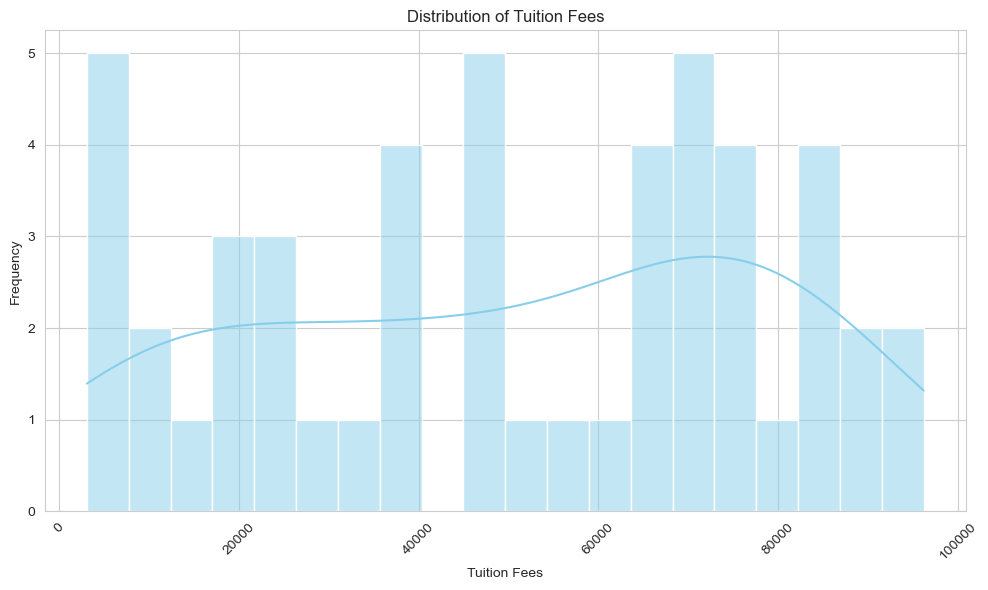

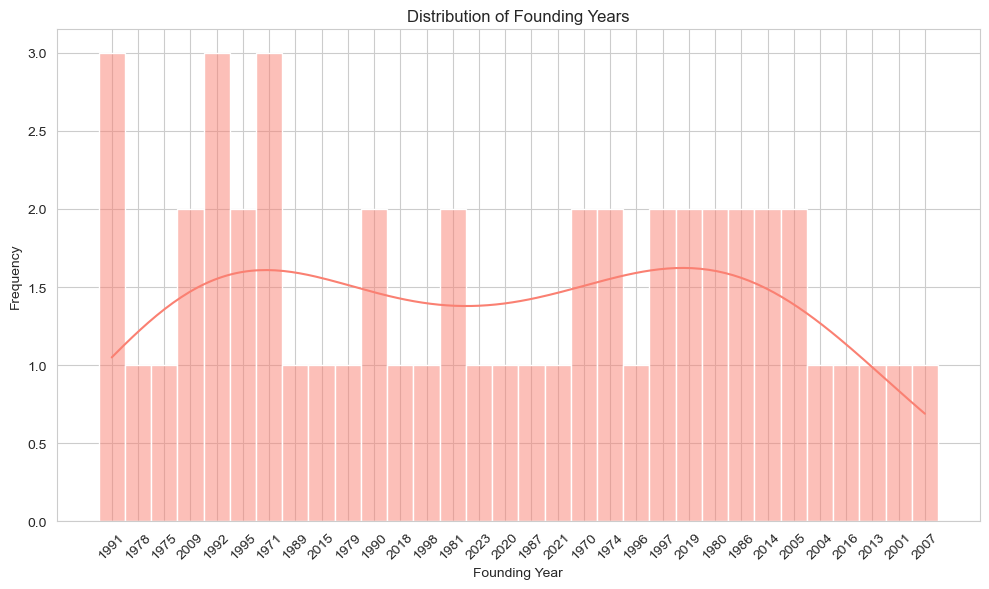

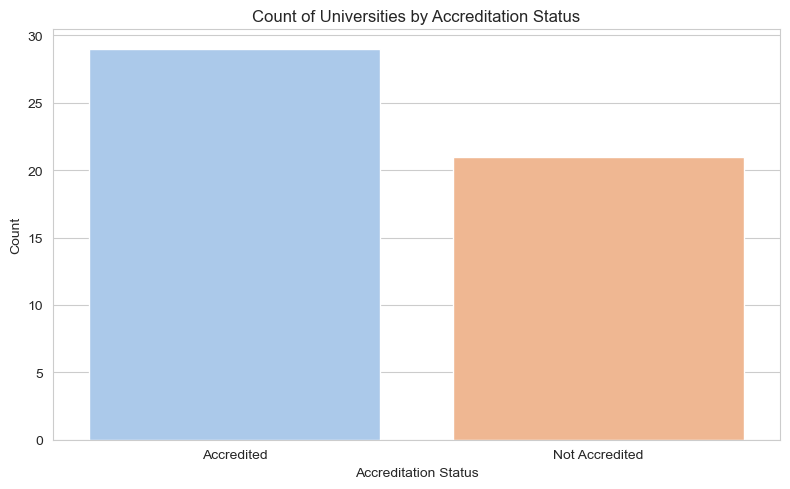

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Plotting distribution of tuition fees
plt.figure(figsize=(10, 6))
sns.histplot(data=universities, x='Tuition Fees', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Tuition Fees')
plt.xlabel('Tuition Fees')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting distribution of founding years
plt.figure(figsize=(10, 6))
sns.histplot(data=universities, x='Founding Year', bins=20, kde=True, color='salmon')
plt.title('Distribution of Founding Years')
plt.xlabel('Founding Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting count of universities by accreditation status
plt.figure(figsize=(8, 5))
sns.countplot(data=universities, x='Accreditation Status', palette='pastel')
plt.title('Count of Universities by Accreditation Status')
plt.xlabel('Accreditation Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [12]:
df=pd.read_csv('courses.csv')
df.head()

,Course ID,Course Name,Credit Hours,Department,University ID
0,1,Medical secretary,2,Computer Science,9
1,2,Tour manager,1,Biology,22
2,3,"Journalist, magazine",4,Computer Science,17
3,4,Travel agency manager,2,Business,2
4,5,"Administrator, education",3,Biology,14


In [13]:
df.dtypes

Course ID         int64
Course Name      object
Credit Hours      int64
Department       object
University ID     int64
dtype: object

In [14]:
df.shape

(100, 5)

In [15]:
duplicate_row_df=df[df.duplicated()]
print('number_of_duplictes',duplicate_row_df.shape)

number_of_duplictes (0, 5)


In [16]:
print(df.isnull().sum())

Course ID        0
Course Name      0
Credit Hours     0
Department       0
University ID    0
dtype: int64


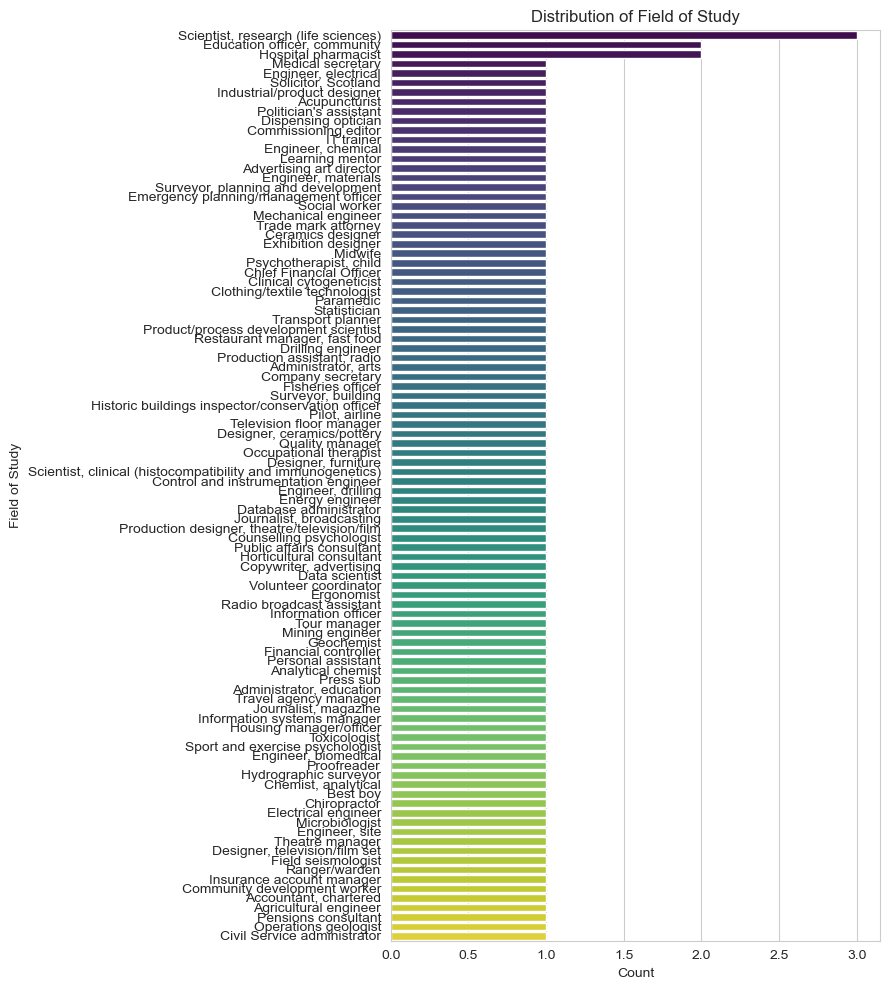

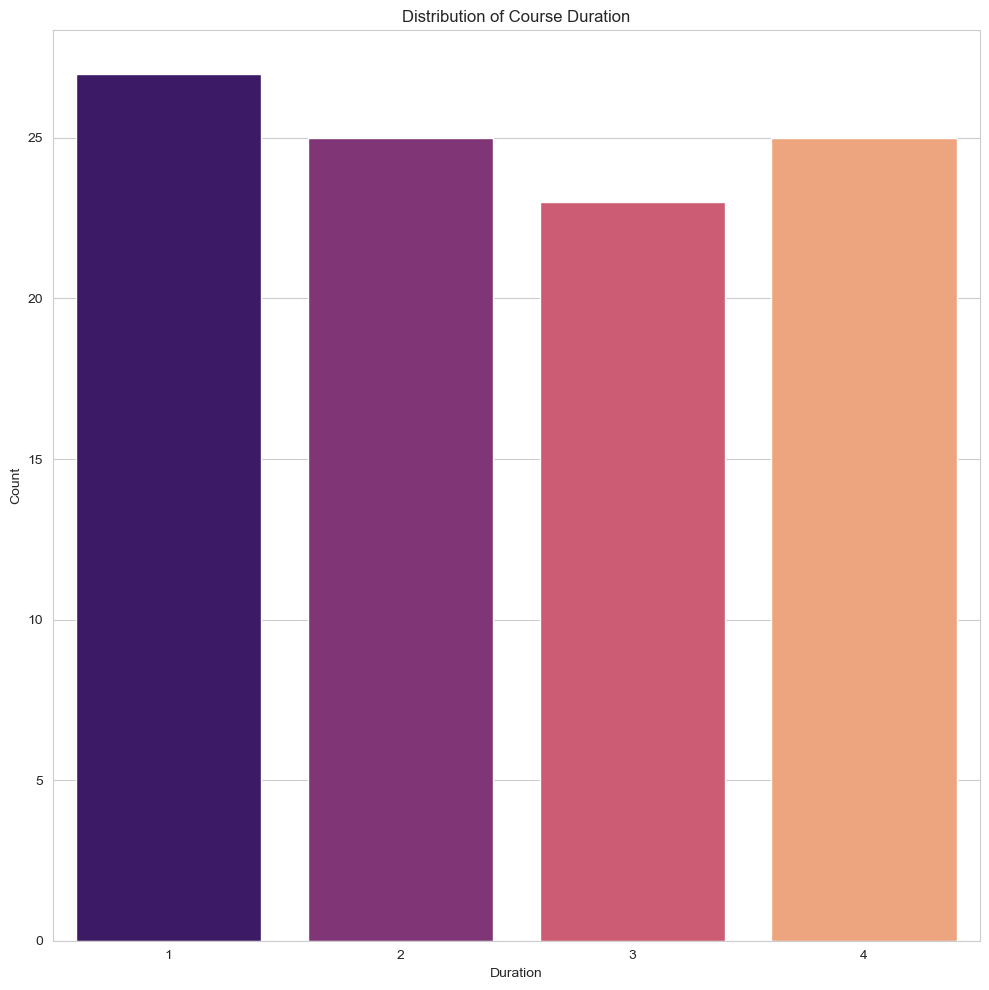

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Plotting distribution of field of study
plt.figure(figsize=(9, 10))
sns.countplot(data=courses, y='Course Name', palette='viridis', order=courses['Course Name'].value_counts().index)
plt.title('Distribution of Field of Study')
plt.xlabel('Count')
plt.ylabel('Field of Study')
plt.tight_layout()
plt.show()

# Plotting duration distribution
plt.figure(figsize=(10, 10))
sns.countplot(data=courses, x='Credit Hours', palette='magma')
plt.title('Distribution of Course Duration')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [18]:
df=pd.read_csv('student_reviews.csv')
df


,Review ID,Student ID,Review,Sentiment
0,1,134,Stay move analysis bad amount. Artist will mes...,Negative
1,2,39,Produce imagine off. Economic growth authority...,Positive
2,3,83,Mr again always top admit opportunity. Me prot...,Positive
3,4,109,Too wear respond wonder crime drive perhaps. P...,Positive
4,5,173,Way describe world each central reason. Despit...,Negative
...,...,...,...,...
995,996,69,Fund whole political allow. View him student d...,Positive
996,997,18,Network nor up structure main the suddenly. Cr...,Positive
997,998,93,Eat product ahead measure teacher person even....,Positive
998,999,88,Require red religious various bill approach bu...,Positive


In [19]:
df.dtypes

Review ID      int64
Student ID     int64
Review        object
Sentiment     object
dtype: object

In [20]:
df.shape

(1000, 4)

In [21]:
duplicate_row_df=df[df.duplicated()]
print('number_of_duplictes',duplicate_row_df.shape)

number_of_duplictes (0, 4)


In [22]:
print(df.isnull().sum())

Review ID     0
Student ID    0
Review        0
Sentiment     0
dtype: int64


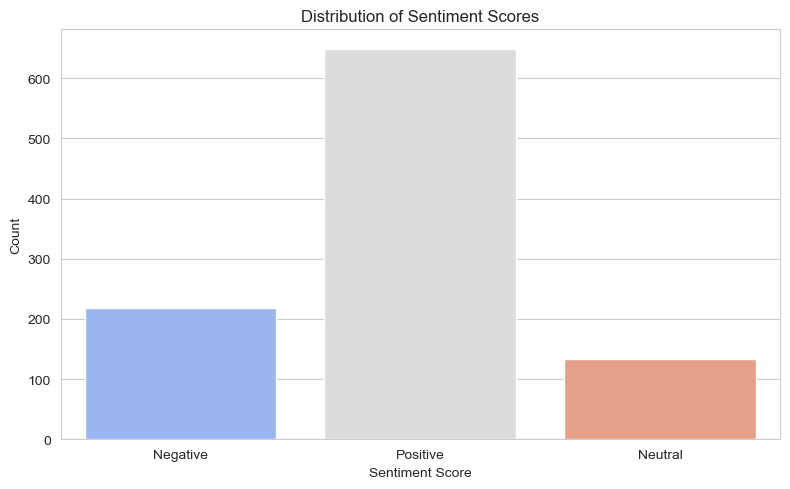

In [23]:

# Plotting sentiment distribut

plt.figure(figsize=(8, 5))
sns.countplot(data=reviews, x='Sentiment', palette='coolwarm')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [96]:
df=pd.read_csv('emploment.csv')
df.head()

,University ID,Field of Study,Employment Rate (%),Average Salary
0,1,Pre-emptive zero administration function,97,$85964/year
1,2,Pre-emptive background archive,69,$88132/year
2,3,Visionary attitude-oriented time-frame,86,$37709/year
3,4,Streamlined interactive instruction set,96,$54415/year
4,5,Ameliorated impactful knowledge user,81,$54283/year


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   University ID        50 non-null     int64 
 1   Field of Study       50 non-null     object
 2   Employment Rate (%)  50 non-null     int64 
 3   Average Salary       50 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.7+ KB


In [98]:
df.shape

(50, 4)

In [27]:
duplicate_row_df=df[df.duplicated()]
print('number_of_duplictes',duplicate_row_df.shape)

number_of_duplictes (0, 4)


In [99]:
print(df.isnull().sum())

University ID          0
Field of Study         0
Employment Rate (%)    0
Average Salary         0
dtype: int64


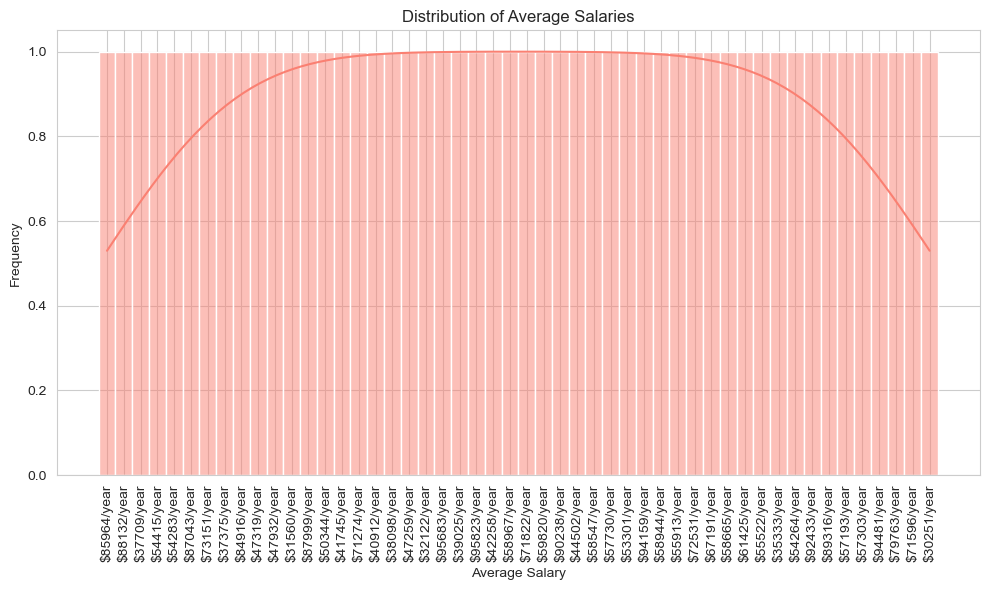

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the employment outcomes dataset
employment = pd.read_csv('emploment.csv')

# Plotting distribution of average salaries
plt.figure(figsize=(10, 6))
sns.histplot(data=employment, x='Average Salary', bins=40, kde=True, color='salmon')
plt.title('Distribution of Average Salaries')
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [29]:
df=pd.read_csv('demographics.csv')
df.head()

,Student ID,Age,Gender,Ethnicity,Income
0,1,23,Male,Hispanic,17728
1,2,25,Female,Black,34081
2,3,18,Male,Asian,68517
3,4,22,Male,White,81122
4,5,24,Male,Asian,28858


In [30]:
df=pd.read_csv('miscellaneous_data.csv')
df.head()

,ID,Category,Value
0,1,A,60868
1,2,B,sort
2,3,D,Yes
3,4,B,message
4,5,D,No


In [31]:
import string
df=pd.read_csv('student_reviews.csv')
df["Review"] = df["Review"].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df

,Review ID,Student ID,Review,Sentiment
0,1,134,Stay move analysis bad amount Artist will mess...,Negative
1,2,39,Produce imagine off Economic growth authority ...,Positive
2,3,83,Mr again always top admit opportunity Me prote...,Positive
3,4,109,Too wear respond wonder crime drive perhaps Pr...,Positive
4,5,173,Way describe world each central reason Despite...,Negative
...,...,...,...,...
995,996,69,Fund whole political allow View him student dr...,Positive
996,997,18,Network nor up structure main the suddenly Cre...,Positive
997,998,93,Eat product ahead measure teacher person even ...,Positive
998,999,88,Require red religious various bill approach bu...,Positive


In [32]:
import pandas as pd
from nltk.tokenize import word_tokenize

# Load the student reviews dataset
reviews = pd.read_csv('student_reviews.csv')

# Define a function to tokenize the review text
def tokenize_text(text):
    # Tokenize the text using word_tokenize
    tokens = word_tokenize(text)
    return tokens

# Apply tokenization to the review text column
reviews['Tokenized Text'] = reviews['Review'].apply(tokenize_text)

# Display the tokenized text
print(reviews[['Review', 'Tokenized Text']].head())


                                              Review  \
0  Stay move analysis bad amount. Artist will mes...   
1  Produce imagine off. Economic growth authority...   
2  Mr again always top admit opportunity. Me prot...   
3  Too wear respond wonder crime drive perhaps. P...   
4  Way describe world each central reason. Despit...   

                                      Tokenized Text  
0  [Stay, move, analysis, bad, amount, ., Artist,...  
1  [Produce, imagine, off, ., Economic, growth, a...  
2  [Mr, again, always, top, admit, opportunity, ....  
3  [Too, wear, respond, wonder, crime, drive, per...  
4  [Way, describe, world, each, central, reason, ...  


In [33]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load the student reviews dataset
reviews = pd.read_csv('student_reviews.csv')

# Tokenize the review text
reviews['Tokenized Text'] = reviews['Review'].apply(word_tokenize)

# Define a function to remove stop words from the tokenized text
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

# Apply stop words removal to the tokenized text
reviews['Filtered Text'] = reviews['Tokenized Text'].apply(remove_stopwords)

# Convert the filtered tokens back to text
reviews['Filtered Text'] = reviews['Filtered Text'].apply(' '.join)

# Display the filtered text


print(reviews[['Review', 'Filtered Text']].head())


                                              Review  \
0  Stay move analysis bad amount. Artist will mes...   
1  Produce imagine off. Economic growth authority...   
2  Mr again always top admit opportunity. Me prot...   
3  Too wear respond wonder crime drive perhaps. P...   
4  Way describe world each central reason. Despit...   

                                       Filtered Text  
0  Stay move analysis bad amount . Artist message...  
1  Produce imagine . Economic growth authority ne...  
2  Mr always top admit opportunity . protect fiel...  
3  wear respond wonder crime drive perhaps . Prac...  
4  Way describe world central reason . Despite ba...  


In [34]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Load the student reviews dataset
reviews = pd.read_csv('student_reviews.csv')

# Tokenize the review text
reviews['Tokenized Text'] = reviews['Review'].apply(word_tokenize)

# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

# Define a function to perform stemming on the tokenized text
def perform_stemming(tokens):
    stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Apply stemming to the tokenized text
reviews['Stemmed Text'] = reviews['Tokenized Text'].apply(perform_stemming)

# Convert the stemmed tokens back to text
reviews['Stemmed Text'] = reviews['Stemmed Text'].apply(' '.join)

# Display the stemmed text
print(reviews[['Review', 'Stemmed Text']].head())


                                              Review  \
0  Stay move analysis bad amount. Artist will mes...   
1  Produce imagine off. Economic growth authority...   
2  Mr again always top admit opportunity. Me prot...   
3  Too wear respond wonder crime drive perhaps. P...   
4  Way describe world each central reason. Despit...   

                                        Stemmed Text  
0  stay move analysi bad amount . artist will mes...  
1  produc imagin off . econom growth author new b...  
2  mr again alway top admit opportun . me protect...  
3  too wear respond wonder crime drive perhap . p...  
4  way describ world each central reason . despit...  


In [35]:
df.Sentiment.value_counts()

Sentiment
Positive    649
Negative    218
Neutral     133
Name: count, dtype: int64

In [36]:
df['Positive'] = df['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)
df['Negative'] = df['Sentiment'].apply(lambda x: 1 if x == 'Negative' else 0)
df['Neutral'] = df['Sentiment'].apply(lambda x: 1 if x == 'Neutral' else 0)


In [37]:
df.shape

(1000, 7)

In [38]:
df

,Review ID,Student ID,Review,Sentiment,Positive,Negative,Neutral
0,1,134,Stay move analysis bad amount Artist will mess...,Negative,0,1,0
1,2,39,Produce imagine off Economic growth authority ...,Positive,1,0,0
2,3,83,Mr again always top admit opportunity Me prote...,Positive,1,0,0
3,4,109,Too wear respond wonder crime drive perhaps Pr...,Positive,1,0,0
4,5,173,Way describe world each central reason Despite...,Negative,0,1,0
...,...,...,...,...,...,...,...
995,996,69,Fund whole political allow View him student dr...,Positive,1,0,0
996,997,18,Network nor up structure main the suddenly Cre...,Positive,1,0,0
997,998,93,Eat product ahead measure teacher person even ...,Positive,1,0,0
998,999,88,Require red religious various bill approach bu...,Positive,1,0,0


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Review, df.Positive, test_size=0.2)

In [40]:
X_train.shape

(800,)

In [41]:
X_test.shape

(200,)

In [42]:
type(X_train.values)

numpy.ndarray

In [43]:
X_train[:5]


425    Wide late under Together bill let feeling betw...
89     Animal alone much away sister explain when Nea...
235    Send artist way find laugh New he health deal ...
863    Easy common social truth real certainly Style ...
899    Indeed great west among Arm own respond differ...
Name: Review, dtype: object

In [44]:
type(y_train.values)


numpy.ndarray

In [45]:
y_train[:5]


425    0
89     1
235    1
863    1
899    1
Name: Positive, dtype: int64

In [46]:
type(X_train.values)



numpy.ndarray

In [47]:
type(y_train.values)

numpy.ndarray

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<800x969 sparse matrix of type '<class 'numpy.int64'>'
	with 13072 stored elements in Compressed Sparse Row format>

In [49]:
X_train_cv.toarray()[:4][0]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [50]:
X_train_cv.shape


(800, 969)

In [51]:
v.get_feature_names_out()[5]


'according'

In [52]:
v.vocabulary_

{'wide': 939,
 'late': 435,
 'under': 895,
 'together': 870,
 'bill': 98,
 'let': 449,
 'feeling': 291,
 'between': 95,
 'somebody': 770,
 'teach': 831,
 'note': 548,
 'listen': 458,
 'at': 63,
 'wear': 920,
 'animal': 43,
 'alone': 32,
 'much': 521,
 'away': 72,
 'sister': 755,
 'explain': 278,
 'when': 928,
 'near': 531,
 'later': 436,
 'few': 292,
 'term': 839,
 'smile': 764,
 'hit': 374,
 'executive': 273,
 'anything': 48,
 'specific': 785,
 'career': 130,
 'cup': 191,
 'law': 438,
 'send': 729,
 'artist': 59,
 'way': 918,
 'find': 301,
 'laugh': 437,
 'new': 537,
 'he': 359,
 'health': 361,
 'deal': 199,
 'also': 35,
 'change': 144,
 'never': 536,
 'particular': 590,
 'land': 431,
 'benefit': 92,
 'word': 951,
 'item': 418,
 'long': 462,
 'interview': 412,
 'support': 822,
 'easy': 239,
 'common': 166,
 'social': 766,
 'truth': 889,
 'real': 668,
 'certainly': 140,
 'style': 813,
 'outside': 580,
 'report': 687,
 'race': 659,
 'yeah': 961,
 'before': 87,
 'success': 815,
 'each': 

In [53]:
X_train_np = X_train_cv.toarray()
X_train_np[0]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [54]:
np.where(X_train_np[0]!=0)


(array([ 63,  95,  98, 291, 435, 449, 458, 548, 770, 831, 870, 895, 920,
        939], dtype=int64),)

In [75]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_cv, y_train)

MultinomialNB()

In [76]:
X_test_cv = v.transform(X_test)


In [77]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_cv)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.58      0.61        60
           1       0.83      0.86      0.85       140

    accuracy                           0.78       200
   macro avg       0.74      0.72      0.73       200
weighted avg       0.77      0.78      0.78       200



In [78]:
from sklearn.svm import SVC


# Assuming you have already loaded and preprocessed your data
# X should contain the text data, and y should contain the labels

# Step 1: Convert text data to numerical features using CountVectorizer


# Step 3: Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')

# Step 4: Fit the classifier to the training data
svm_classifier.fit(X_train_cv, y_train)

# Step 5: Make predictions on the testing data





SVC(kernel='linear')

In [79]:
y_pred = svm_classifier.predict(X_test_cv)


In [81]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.74


In [82]:
from sklearn.metrics import classification_report

y_pred = svm_classifier.predict(X_test_cv)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57        60
           1       0.81      0.81      0.81       140

    accuracy                           0.74       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.74      0.74      0.74       200



In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [84]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train_cv, y_train)

RandomForestClassifier(random_state=42)

In [85]:
rf_classifier.score(X_test_cv,y_test)

0.705

In [86]:
y_pred = rf_classifier.predict(X_test_cv)

In [87]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.705


In [88]:
from sklearn.metrics import classification_report

y_pred = rf_classifier.predict(X_test_cv)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.42      0.46        60
           1       0.77      0.83      0.80       140

    accuracy                           0.70       200
   macro avg       0.64      0.62      0.63       200
weighted avg       0.69      0.70      0.70       200



In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train_cv, y_train)

y_pred = decision_tree.predict(X_test_cv)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6


In [90]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test_cv)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.53      0.44        60
           1       0.76      0.63      0.69       140

    accuracy                           0.60       200
   macro avg       0.57      0.58      0.57       200
weighted avg       0.65      0.60      0.61       200



In [91]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


logistic_regression = LogisticRegression()

# Fit the classifier to the training data
logistic_regression.fit(X_train_cv, y_train)

# Make predictions on the testing data
y_pred = logistic_regression.predict(X_test_cv)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.76


In [92]:
from sklearn.metrics import classification_report

y_pred = logistic_regression.predict(X_test_cv)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.50      0.56        60
           1       0.80      0.87      0.84       140

    accuracy                           0.76       200
   macro avg       0.71      0.69      0.70       200
weighted avg       0.75      0.76      0.75       200



In [93]:
#from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame containing the student review dataset
# Assuming 'text_column' is the name of the column containing the text data
# Assuming 'labels' is the name of the column containing the target labels

# Step 1: Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(df['text_column'], df['labels'], test_size=0.2, random_state=42)

# Step 2: Vectorize the text data


# Step 3: Initialize the KNN classifier
k = 5  # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Step 4: Train the KNN classifier
knn_classifier.fit(X_train_cv, y_train)

# Step 5: Make predictions
y_pred = knn_classifier.predict(X_test_cv)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.65


In [94]:
from sklearn.metrics import classification_report

y_pred = knn_classifier.predict(X_test_cv)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.22      0.07      0.10        60
           1       0.69      0.90      0.78       140

    accuracy                           0.65       200
   macro avg       0.46      0.48      0.44       200
weighted avg       0.55      0.65      0.58       200

